**Team : Sigmoid Freud**

Sudeshna Bora

Zoe Harrington

Konstantin Tsafatinos

In [0]:
#import libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import glob
from scipy import ndimage
import os
%matplotlib inline

 Exercise 1.1(a)

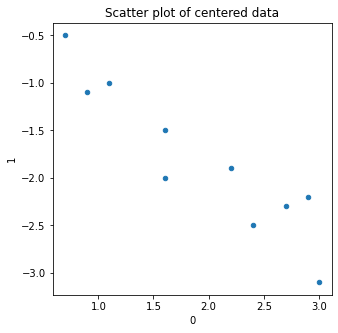

In [2]:
f = open('pca-data-2d.dat.txt')
data = pd.read_table(f, header=None, sep='   ',lineterminator='\n', engine='python')

#center
data_centered = data - data.mean()

#plot
ax = data.plot(kind='scatter', x=0, y=1, title='Scatter plot of centered data', figsize=[5,5])

Exercise 1.1 (b)

In [0]:
# calculate eigenvectors and eigenvalues
covariance = np.cov(data_centered.T)
evals, evecs = np.linalg.eig(covariance)
evecs = evecs[::-1]
transmat = evecs.T
evec1 = transmat[0] #evecs[:, 0]
evec2 = transmat[1] #evecs[:, 1]


In [0]:
data_trans = np.dot(transmat, data_centered.T)

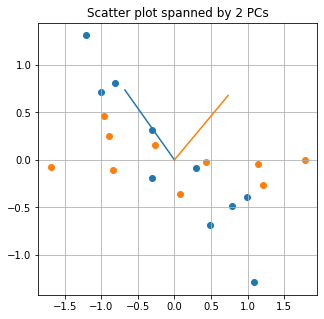

In [7]:
plt.figure(figsize=(5, 5))
plt.scatter(data_centered[0], data_centered[1])
plt.plot([0, evec1[0]], [0, evec1[1]])
plt.plot([0, evec2[0]], [0, evec2[1]])
plt.scatter(data_trans[0], data_trans[1])
plt.title('Scatter plot spanned by 2 PCs')
plt.grid()
plt.show()

Exercise 1.1 (c)

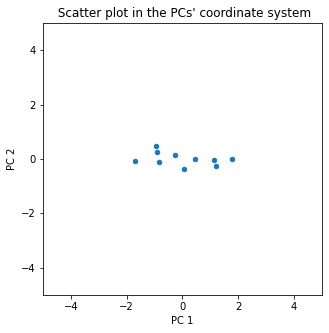

In [8]:
#transform into the coordinate system of the PCAs
datan = np.dot(evecs, data_centered.T).T
datan = pd.DataFrame(datan)

#plot
ax = datan.plot(kind='scatter', x=0, y=1, title=' Scatter plot in the PCs\' coordinate system', figsize=[5,5]);

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_xlim([-5,5]);
ax.set_ylim([-5,5]);

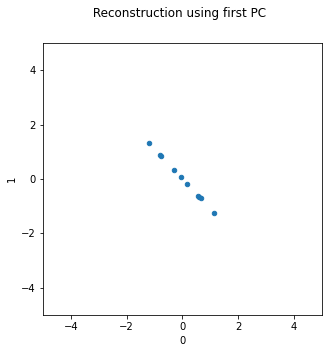

In [9]:
#reconstruction using the first principal component
pc1 = evecs[0].reshape([1,2])

#projection onto the PC1
datan = np.dot(pc1, data_centered.T)

#reconstruction (reversing that projection)
datan = np.dot(datan.T,pc1)

datan = pd.DataFrame(datan)
datan.plot(subplots=True, kind='scatter', x=0, y=1, title=' Reconstruction using first PC', xlim=[-5,5],ylim=[-5,5],figsize=[5,5]);

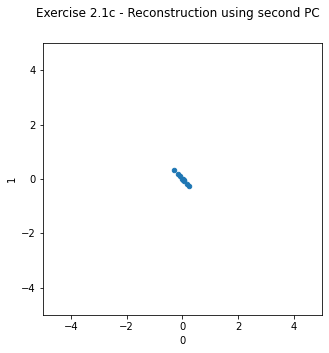

In [10]:
#reconstruction using the second principal component
datan = np.dot(evecs[1], data_centered.T)
d = datan.reshape(10,1)
eig = evecs[0].reshape(2,1)
datan = np.dot(d,eig.T)

datan = pd.DataFrame(datan)
datan.plot(subplots=True, kind='scatter', x=0, y=1, title='Exercise 2.1c - Reconstruction using second PC',xlim=[-5,5],ylim=[-5,5],figsize=[5,5]);

2 

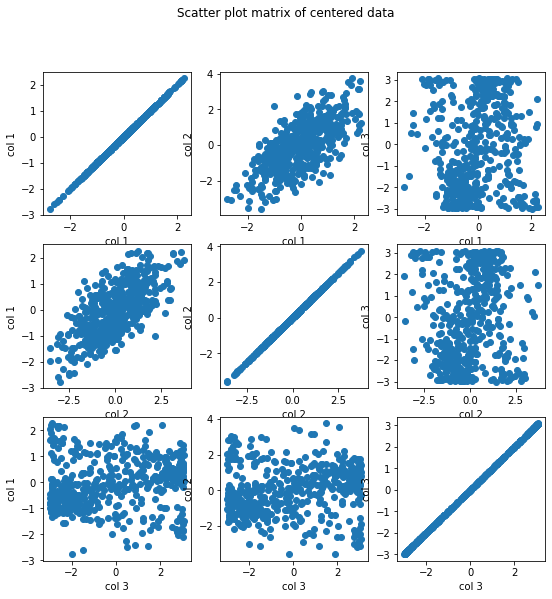

In [11]:
f = open('pca-data-3d.txt')
data = pd.read_table(f, sep=',',lineterminator='\n')

#center
data = data - data.mean()

def plot_3D_scatter(data, title='Scatter Matrix'):
    rows = data.shape[1]
    fig, ax = plt.subplots(nrows=rows, ncols=rows, figsize=(9, 9))
    fig.suptitle(title)
    for x, y in itertools.product(range(rows), repeat=2):
        ax[x, y].scatter(data[:, x], data[:, y])
        ax[x, y].set_xlabel('col {}'.format(x+1))
        ax[x, y].set_ylabel('col {}'.format(y+1))

plot_3D_scatter(data.to_numpy(), 'Scatter plot matrix of centered data')


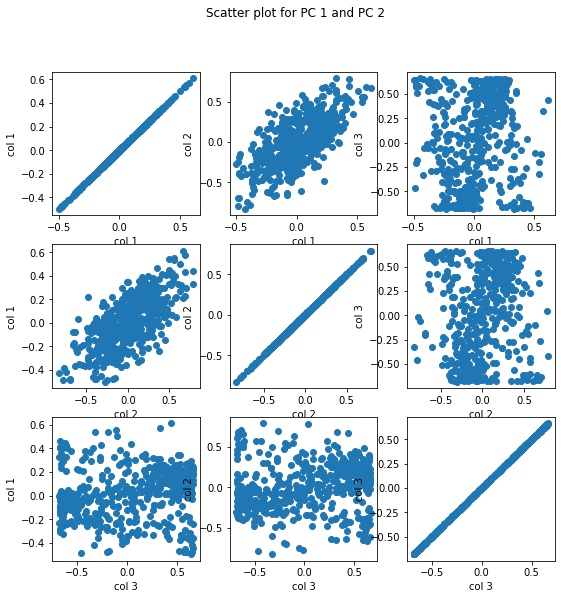

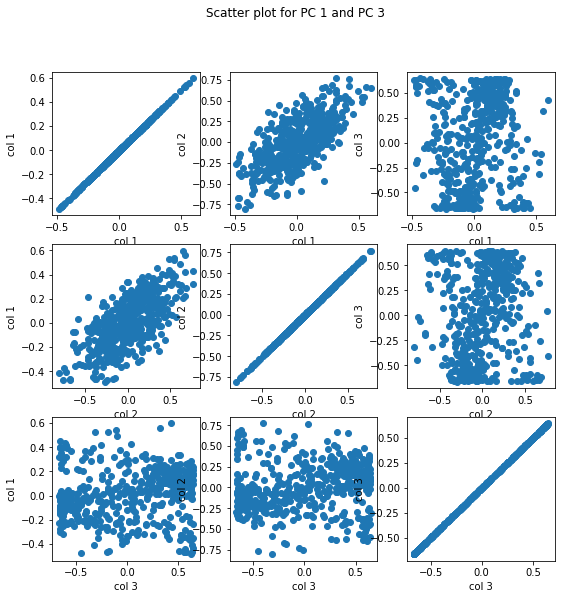

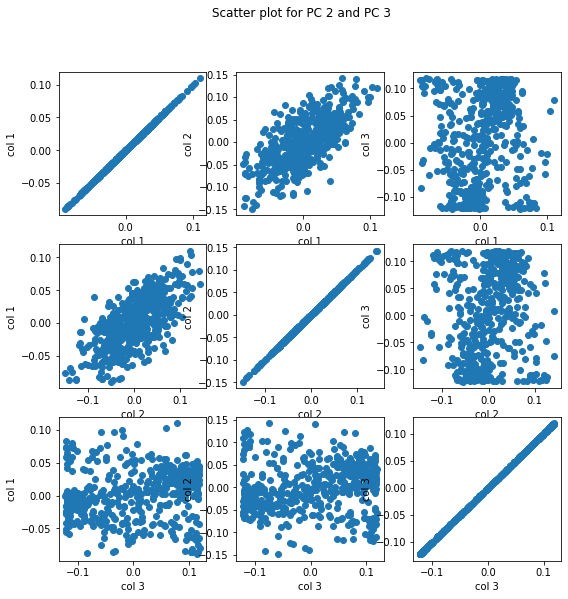

In [12]:
#calculate eigenvectors and eigenvalues
covmat = data.cov()
eigvals, eigvecs = np.linalg.eigh(covmat)

eigvecs = eigvecs[::-1]


#for every combination of the three PCs, make a scatter plot
for comb in itertools.combinations(range(3), 2):
    transformed = np.dot(eigvecs[comb],data.T).T
    data = pd.DataFrame(transformed)
    plot_3D_scatter(data.to_numpy(), title="Scatter plot for PC {} and PC {}".format(comb[0]+1,comb[1]+1))

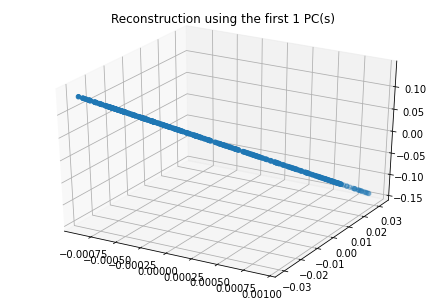

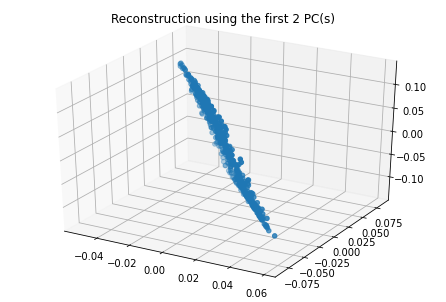

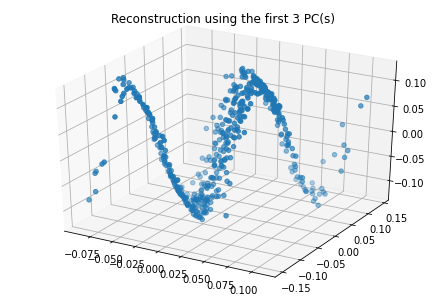

In [13]:
for num_pcs in range(3):
    pcs = eigvecs[0:num_pcs+1]
    
    transformed = np.dot(pcs,data.T).T
    reconstructed = np.dot(pcs.T, transformed.T).T

    fig = plt.figure()
    ax = Axes3D(fig)
    fig.suptitle("Reconstruction using the first {} PC(s)".format(num_pcs+1))
    
    ax.scatter(reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2])

Exercise 1.3

In [0]:
data = pd.read_csv("expDat.txt", index_col=0).to_numpy()
data = data.astype(float)
data -= data.mean(axis=0)

cov = np.cov(data.T)
_, eigvecs = np.linalg.eigh(cov)
eigvecs = eigvecs[::-1]

timesteps = np.linspace(0, 1, 100)




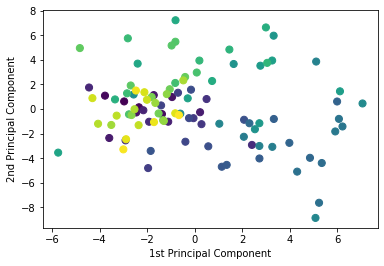

In [15]:
datan = np.dot(eigvecs[:2], data.T).T
plt.scatter(datan[:, 0], datan[:, 1], c=timesteps, s=50)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

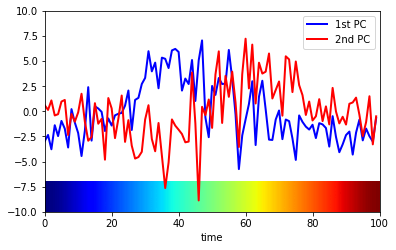

In [16]:
datan = np.dot(eigvecs[0], data.T).T
plt.plot(np.arange(100), datan, c='blue', label='1st PC', linewidth=2)
datan = np.dot(eigvecs[1], data.T).T
plt.plot(np.arange(100), datan, c='red', label='2nd PC', linewidth=2)
plt.imshow([np.linspace(0, 1, 20), np.linspace(0, 1, 20)], cmap=plt.cm.jet, interpolation='bicubic', extent=[0, 100, -10, -7], aspect=3)
plt.axis((0, 100, -10, 10))
plt.legend()
plt.xlabel('time')
plt.show()

In [0]:
new_data = np.random.RandomState(0).permutation(data.T).T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


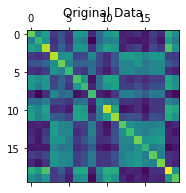

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


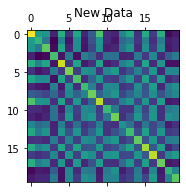

In [18]:
covOri = np.cov(data.T)
plt.subplot(121).matshow(covOri)
plt.subplot(121).set_title("Original Data")
plt.show()

covNew = np.cov(new_data.T)
plt.subplot(122).matshow(covNew)
plt.subplot(122).set_title("New Data")
plt.show()


Text(0, 0.5, 'Eigenvalue')

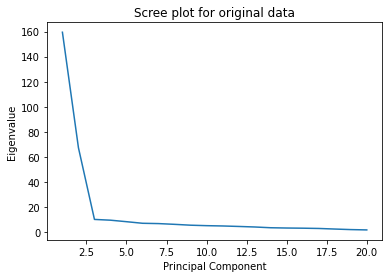

In [19]:
eigvalsOri, eigvecsOri = np.linalg.eigh(covOri)
valsOri = np.arange(len(eigvalsOri)) + 1
plt.plot(valsOri, eigvalsOri[::-1])
plt.title('Scree plot for original data')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Text(0, 0.5, 'Eigenvalue')

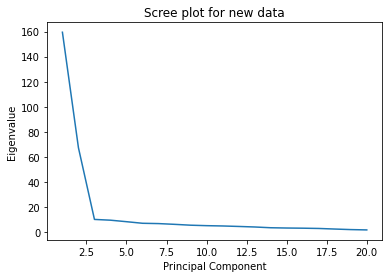

In [20]:
eigvalsNew, eigvecsNew = np.linalg.eigh(covNew)
valsNew = np.arange(len(eigvalsNew)) + 1
plt.plot(valsNew, eigvalsNew[::-1])
plt.title('Scree plot for new data')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Reshuffling does not make any difference.


Shuffling row should not affect as all the parameters for PC calculation is order invariant.

Exercise 1.4

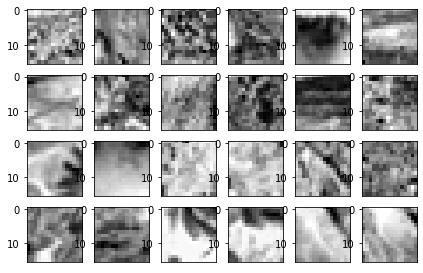

In [21]:
nature = [plt.imread(x) for x in glob.glob('imgpca/n*.jpg')]
buildings = [plt.imread(x) for x in glob.glob('imgpca/b*.jpg')]

#Calculate sample for nature
nature_samples = np.empty((5000, 16, 16))
for i in range(5000):
  image = random.choice(nature)
  x = int(random.random() * (image.shape[0] - 16))
  y = int(random.random() * (image.shape[1] - 16))
  nature_samples[i] = image[x: x + 16, y: y + 16]

fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(7, 7 / 6 * 4))
temp_samples = nature_samples[:24] / 256
for x, y in itertools.product(range(4), range(6)):
  nature_sample = temp_samples[x * 6 + y]
  ax[x, y].get_xaxis().set_visible(False)
  ax[x, y].imshow(nature_sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

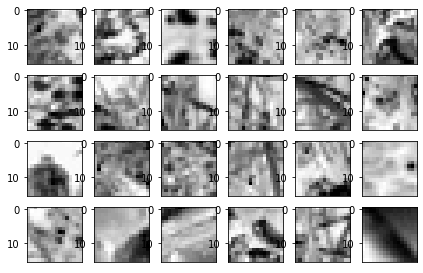

In [24]:
#Calculate sample for building
building_samples = np.empty((5000, 16, 16))
for i in range(5000):
  image = random.choice(nature)
  x = int(random.random() * (image.shape[0] - 16))
  y = int(random.random() * (image.shape[1] - 16))
  building_samples[i] = image[x: x + 16, y: y + 16]

fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(7, 7 / 6 * 4))
temp_samples = building_samples[:24] / 256
for x, y in itertools.product(range(4), range(6)):
  building_sample = temp_samples[x * 6 + y]
  ax[x, y].get_xaxis().set_visible(False)
  ax[x, y].imshow(building_sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [0]:
nature_samples = nature_samples.reshape((len(nature_samples), -1))
building_samples = building_samples.reshape((len(building_samples), -1))

def calculate_PC(images):
    images -= images.mean(axis=0)
    cov = np.cov(images.T)
    eig, pcs = np.linalg.eigh(cov)
    pcs, eig = pcs[::-1], eig[::-1]
    return pcs, eig

nature_pcs, nature_eig = calculate_PC(nature_samples)
buildings_pcs, buildings_eig = calculate_PC(building_samples)

In [0]:
n_patches = []
b_patches = []
for img_name in os.listdir('imgpca'):
    if(img_name =='.ipynb_checkpoints'):
      continue
    img = plt.imread(os.path.join('imgpca', img_name))
    for i in range(500):
        x = np.random.randint(img.shape[0] - 16)
        y = np.random.randint(img.shape[1] - 16)
        patch = img[x:x+16, y:y+16].flatten()
        if img_name.startswith('n'):
            n_patches.append(patch)
        elif img_name.startswith('b'):
            b_patches.append(patch)
        
n_patches = np.array(n_patches)
b_patches = np.array(b_patches)


In [0]:
n_patches_centered = n_patches - n_patches.mean(axis=0)
b_patches_centered = b_patches - b_patches.mean(axis=0)
n_covariance = np.cov(n_patches_centered.T)
b_covariance = np.cov(b_patches_centered.T)
n_evals, n_evecs = np.linalg.eig(n_covariance)
b_evals, b_evecs = np.linalg.eig(b_covariance)

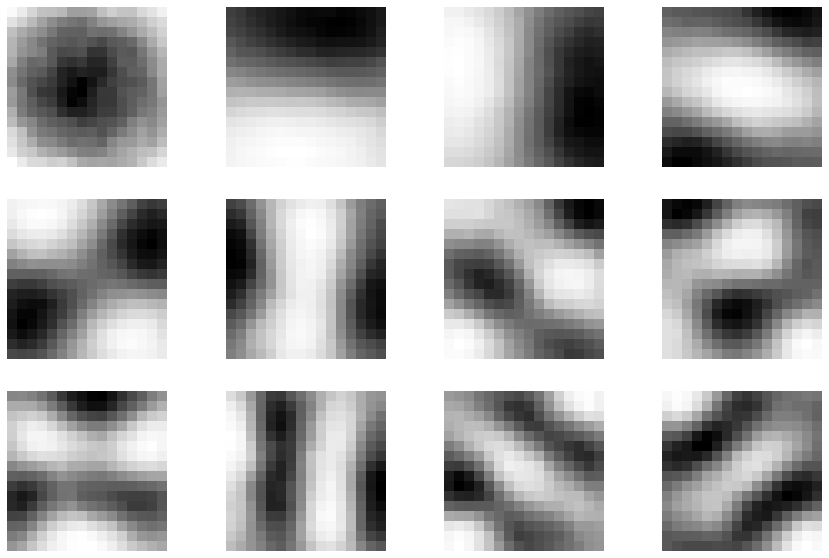

In [35]:
# Nature PCAs.
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.imshow(n_evecs.T[i].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.axis('off')

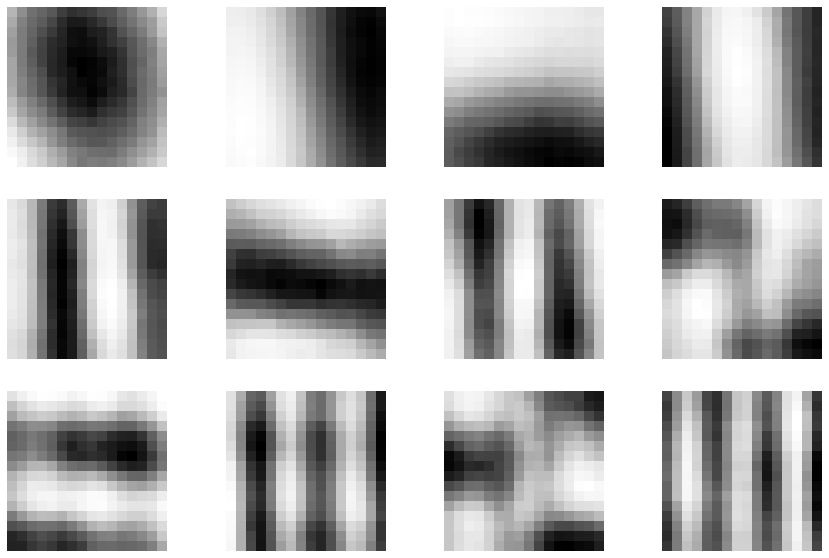

In [36]:
# Building PCAs.
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.imshow(b_evecs.T[i].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.axis('off')

The difference that we notice in the patches is as follows :- </br>
For building patches we seem some hard lines and edges whereas for natural patches the overall PC is soft.

(0.0, 80000.0)

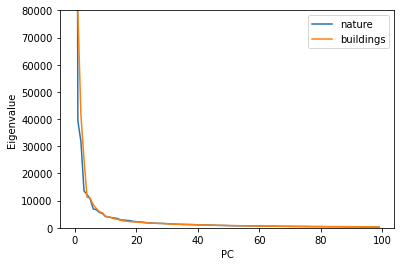

In [37]:
plt.plot(n_evals[:100], label='nature')
plt.plot(b_evals[:100], label='buildings')
plt.ylabel('Eigenvalue')
plt.xlabel('PC')
plt.legend()
plt.ylim(0, 80000)

 For both image categories, one should keep around 20 PCs according to the Scree test. 

Reconstructing the patches

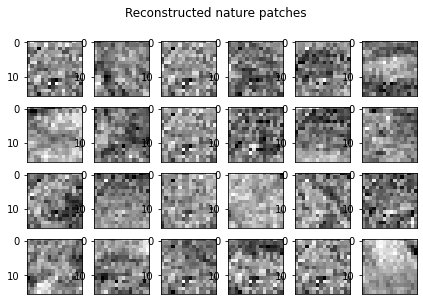

In [42]:
n_subspace = nature_pcs[:200]
n_rec = np.dot(n_subspace.T, np.dot(n_subspace, nature_samples.T)).T
n_rec = n_rec.reshape((-1, 16, 16))

#plot
patches = n_rec[:24]/256
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(7, 7 / 6 * 4))
fig.suptitle('Reconstructed nature patches')
for x, y in itertools.product(range(4), range(6)):
  patch = patches[x * 6 + y]
  ax[x, y].get_xaxis().set_visible(False)
  ax[x, y].imshow(patch, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()



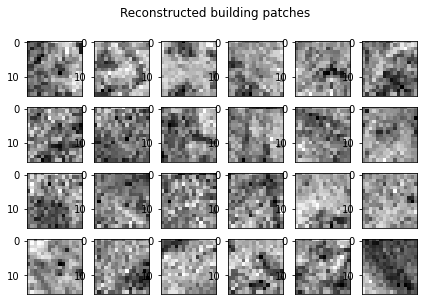

In [44]:
#reconstructing image plots 
b_subspace = buildings_pcs[:200]
b_rec = np.dot(b_subspace.T, np.dot(b_subspace, building_samples.T)).T
b_rec = b_rec.reshape((-1, 16, 16))


patches = b_rec[:24]/256
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(7, 7 / 6 * 4))
fig.suptitle('Reconstructed building patches')
for x, y in itertools.product(range(4), range(6)):
  patch = patches[x * 6 + y]
  ax[x, y].get_xaxis().set_visible(False)
  ax[x, y].imshow(patch, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

There is a drastic drop in quality and hence images cannot be represented in linear space.